## Imports y Carga de Datos

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")

# Cargar los datasets principales
print("Cargando datasets...")

# Paths arbitrarios - ajustar según ubicación real
direccion_B2C_transacciones = '../Datos/base_1_transaccional.txt'
df_transaccional = pd.read_csv(direccion_B2C_transacciones, sep="\t", encoding='utf-8')
direccion_B2C_cotizaciones = '../Datos/base_2_cotizaciones.txt'
df_cotizaciones = pd.read_csv(direccion_B2C_cotizaciones, sep="\t", encoding='utf-8')
direccion_B2B_transacciones = '../Datos/base_3_transaccional_b2b.txt'
df_b2b = pd.read_csv(direccion_B2B_transacciones, sep="\t", encoding='utf-8')
print("✅ Datasets cargados exitosamente")

Cargando datasets...
✅ Datasets cargados exitosamente


## Información Básica de los Datasets

In [4]:
# Información general de cada dataset
datasets = {
    'Transaccional B2C': df_transaccional,
    'Cotizaciones B2C': df_cotizaciones,
    'Transaccional B2B': df_b2b
}

print("="*80)
print("📊 RESUMEN GENERAL DE LOS DATASETS")
print("="*80)

for nombre, df in datasets.items():
    print(f"\n🔹 {nombre.upper()}")
    print(f"   • Filas: {df.shape[0]:,}")
    print(f"   • Columnas: {df.shape[1]}")
    print(f"   • Tamaño en memoria: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")
    print(f"   • Periodo: {df.iloc[:,0].min() if 'fecha' in str(df.columns[0]).lower() else 'N/A'} - {df.iloc[:,0].max() if 'fecha' in str(df.columns[0]).lower() else 'N/A'}")

📊 RESUMEN GENERAL DE LOS DATASETS

🔹 TRANSACCIONAL B2C
   • Filas: 2,099,836
   • Columnas: 18
   • Tamaño en memoria: 1628.7 MB
   • Periodo: 1971-01-02 - 1973-01-31

🔹 COTIZACIONES B2C
   • Filas: 180,387
   • Columnas: 11
   • Tamaño en memoria: 86.9 MB
   • Periodo: N/A - N/A

🔹 TRANSACCIONAL B2B
   • Filas: 25,866
   • Columnas: 10
   • Tamaño en memoria: 13.7 MB
   • Periodo: 2007-01-03 - 2010-02-18


## Estructura y Tipos de Datos

In [5]:
print("="*80)
print("📋 ESTRUCTURA DE LOS DATASETS")
print("="*80)

for nombre, df in datasets.items():
    print(f"\n🔹 {nombre.upper()} - COLUMNAS:")
    for i, col in enumerate(df.columns, 1):
        tipo = str(df[col].dtype)
        unique_vals = df[col].nunique()
        print(f"   {i:2d}. {col:<30} | {tipo:<10} | {unique_vals:,} valores únicos")

📋 ESTRUCTURA DE LOS DATASETS

🔹 TRANSACCIONAL B2C - COLUMNAS:
    1. fecha                          | object     | 756 valores únicos
    2. pedido                         | int64      | 933,935 valores únicos
    3. id                             | int64      | 419,226 valores únicos
    4. edad                           | int64      | 50 valores únicos
    5. municipio                      | object     | 808 valores únicos
    6. zona                           | object     | 34 valores únicos
    7. asesor                         | object     | 608 valores únicos
    8. punto de venta                 | object     | 66 valores únicos
    9. cluster                        | object     | 9 valores únicos
   10. categoria_macro                | object     | 5 valores únicos
   11. categoria                      | object     | 27 valores únicos
   12. subcategoria                   | object     | 102 valores únicos
   13. producto                       | object     | 7,280 valores únicos


## Estadísticas Descriptivas Clave

In [6]:
print("="*80)
print("📈 ESTADÍSTICAS DESCRIPTIVAS CLAVE")
print("="*80)

# Transaccional B2C
if 'valor' in df_transaccional.columns:
    print(f"\n🔹 TRANSACCIONAL B2C:")
    print(f"   • Clientes únicos: {df_transaccional['id'].nunique():,}")
    print(f"   • Productos únicos: {df_transaccional['producto'].nunique():,}")
    print(f"   • Pedidos únicos: {df_transaccional['pedido'].nunique():,}")
    print(f"   • Valor total ventas: ${df_transaccional['valor'].sum():,.0f}")
    print(f"   • Valor promedio por transacción: ${df_transaccional['valor'].mean():.0f}")
    print(f"   • Categorías macro: {df_transaccional['categoria_macro'].nunique()}")

# Cotizaciones B2C
if 'valor' in df_cotizaciones.columns:
    print(f"\n🔹 COTIZACIONES B2C:")
    print(f"   • Cotizaciones únicas: {df_cotizaciones['cotizacion'].nunique():,}")
    print(f"   • Productos cotizados únicos: {df_cotizaciones['producto'].nunique():,}")
    print(f"   • Valor total cotizado: ${df_cotizaciones['valor'].sum():,.0f}")
    print(f"   • Valor promedio por cotización: ${df_cotizaciones['valor'].mean():.0f}")
    if 'estado_cotizacion' in df_cotizaciones.columns:
        print(f"   • Estados de cotización: {df_cotizaciones['estado_cotizacion'].unique()}")

# B2B
if 'valor_total' in df_b2b.columns:
    print(f"\n🔹 TRANSACCIONAL B2B:")
    print(f"   • Clientes B2B únicos: {df_b2b['id_b2b'].nunique():,}")
    print(f"   • Productos únicos: {df_b2b['producto'].nunique():,}")
    print(f"   • Valor total B2B: ${df_b2b['valor_total'].sum():,.0f}")
    print(f"   • Valor promedio por transacción: ${df_b2b['valor_total'].mean():.0f}")
    print(f"   • Categorías B2B macro: {df_b2b['categoria_b2b_macro'].nunique()}")

📈 ESTADÍSTICAS DESCRIPTIVAS CLAVE

🔹 TRANSACCIONAL B2C:
   • Clientes únicos: 419,226
   • Productos únicos: 7,280
   • Pedidos únicos: 933,935
   • Valor total ventas: $83,975,996
   • Valor promedio por transacción: $40
   • Categorías macro: 5

🔹 COTIZACIONES B2C:
   • Cotizaciones únicas: 88,030
   • Productos cotizados únicos: 2,735
   • Valor total cotizado: $6,657,250
   • Valor promedio por cotización: $37
   • Estados de cotización: ['Cotización Ganada' 'Cotización Expirada' 'Cotización Perdida' 'Abierta']

🔹 TRANSACCIONAL B2B:
   • Clientes B2B únicos: 6
   • Productos únicos: 2,564
   • Valor total B2B: $39,729,642
   • Valor promedio por transacción: $1536
   • Categorías B2B macro: 31


## Análisis de Valores Faltantes

In [7]:
print("="*80)
print("❌ ANÁLISIS DE VALORES FALTANTES")
print("="*80)

for nombre, df in datasets.items():
    print(f"\n🔹 {nombre.upper()}:")
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    if missing_data.sum() == 0:
        print("   ✅ No hay valores faltantes")
    else:
        missing_df = pd.DataFrame({
            'Valores Faltantes': missing_data,
            'Porcentaje': missing_percent
        })
        missing_df = missing_df[missing_df['Valores Faltantes'] > 0].sort_values('Valores Faltantes', ascending=False)
        print(missing_df.to_string())

❌ ANÁLISIS DE VALORES FALTANTES

🔹 TRANSACCIONAL B2C:
        Valores Faltantes  Porcentaje
precio                531    0.025288
zona                   18    0.000857

🔹 COTIZACIONES B2C:
   ✅ No hay valores faltantes

🔹 TRANSACCIONAL B2B:
   ✅ No hay valores faltantes


## Insights Principales para el Informe

In [8]:
print("="*80)
print("🎯 INSIGHTS PRINCIPALES PARA EL INFORME")
print("="*80)

# Calcular métricas clave
total_clientes_b2c = df_transaccional['id'].nunique()
total_productos_transaccional = df_transaccional['producto'].nunique()
total_productos_cotizaciones = df_cotizaciones['producto'].nunique()
total_productos_b2b = df_b2b['producto'].nunique()

# Productos en común entre datasets
productos_comunes_b2c = set(df_transaccional['producto'].unique()) & set(df_cotizaciones['producto'].unique())
productos_comunes_b2c_b2b = set(df_transaccional['producto'].unique()) & set(df_b2b['producto'].unique())

print(f"""
📊 MÉTRICAS CONSOLIDADAS:

🔹 VOLUMEN DE DATOS:
   • Total registros B2C (transacciones): {len(df_transaccional):,}
   • Total registros B2C (cotizaciones): {len(df_cotizaciones):,}
   • Total registros B2B: {len(df_b2b):,}

🔹 DIVERSIDAD DE PRODUCTOS:
   • Productos únicos en transacciones B2C: {total_productos_transaccional:,}
   • Productos únicos en cotizaciones B2C: {total_productos_cotizaciones:,}
   • Productos únicos en B2B: {total_productos_b2b:,}
   • Productos comunes B2C (trans vs cot): {len(productos_comunes_b2c):,}
   • Productos comunes B2C vs B2B: {len(productos_comunes_b2c_b2b):,}

🔹 BASE DE CLIENTES:
   • Clientes únicos B2C: {total_clientes_b2c:,}
   • Clientes únicos B2B: {df_b2b['id_b2b'].nunique():,}

🔹 VALOR ECONÓMICO:
   • Valor total transacciones B2C: ${df_transaccional['valor'].sum():,.0f}
   • Valor total cotizaciones B2C: ${df_cotizaciones['valor'].sum():,.0f}
   • Valor total transacciones B2B: ${df_b2b['valor_total'].sum():,.0f}
""")

🎯 INSIGHTS PRINCIPALES PARA EL INFORME

📊 MÉTRICAS CONSOLIDADAS:

🔹 VOLUMEN DE DATOS:
   • Total registros B2C (transacciones): 2,099,836
   • Total registros B2C (cotizaciones): 180,387
   • Total registros B2B: 25,866

🔹 DIVERSIDAD DE PRODUCTOS:
   • Productos únicos en transacciones B2C: 7,280
   • Productos únicos en cotizaciones B2C: 2,735
   • Productos únicos en B2B: 2,564
   • Productos comunes B2C (trans vs cot): 2,735
   • Productos comunes B2C vs B2B: 0

🔹 BASE DE CLIENTES:
   • Clientes únicos B2C: 419,226
   • Clientes únicos B2B: 6

🔹 VALOR ECONÓMICO:
   • Valor total transacciones B2C: $83,975,996
   • Valor total cotizaciones B2C: $6,657,250
   • Valor total transacciones B2B: $39,729,642



## Visualización Rápida 

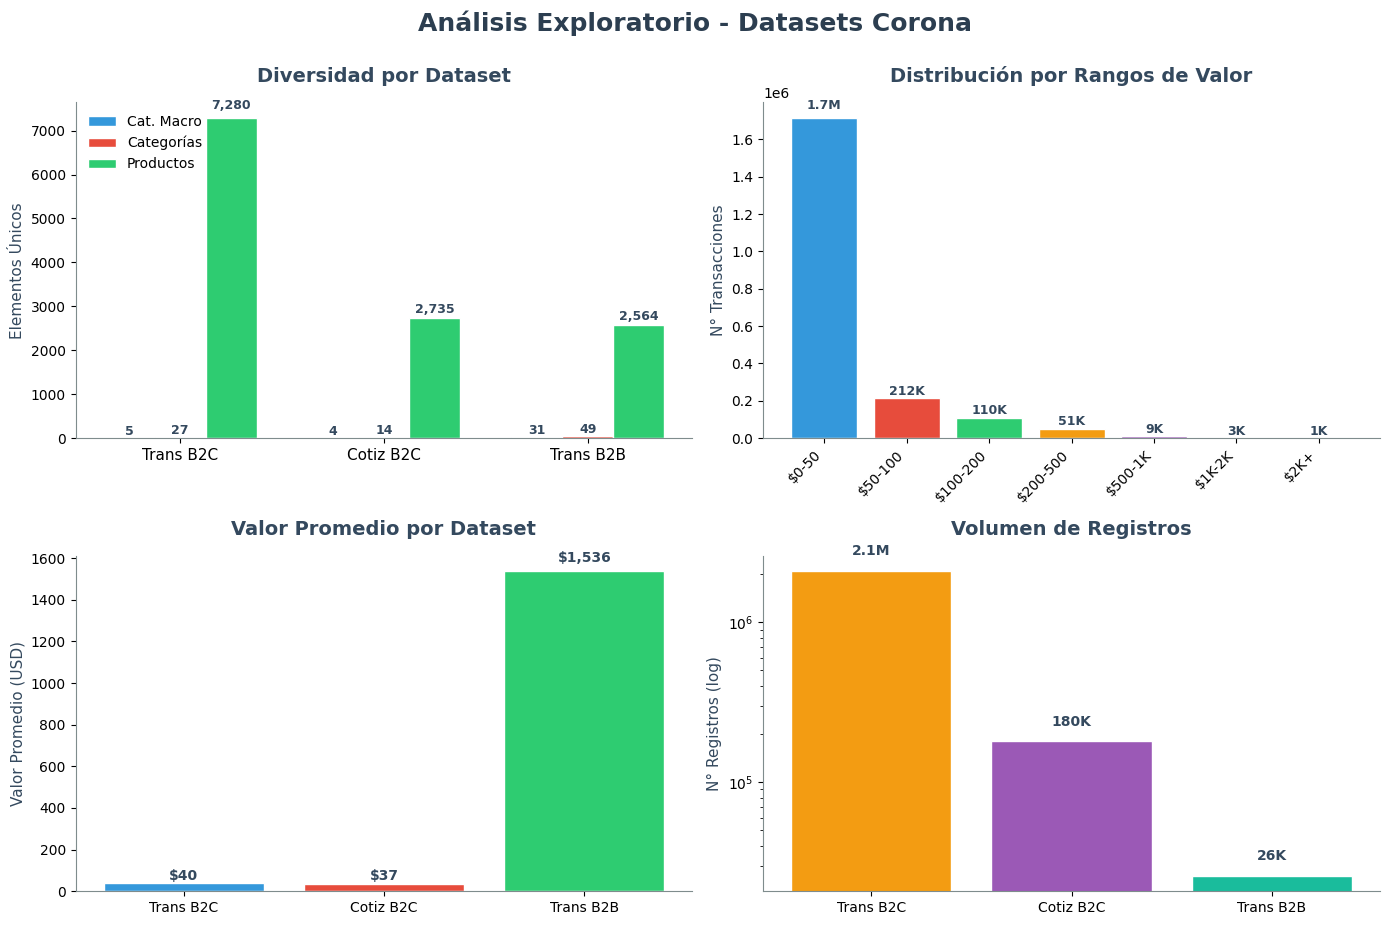

📊 Visualizaciones con colores planos profesionales generadas


In [13]:
# Crear visualizaciones profesionales con colores planos
plt.style.use('default')

# Paleta de colores planos y profesionales
colors = ['#3498DB', '#E74C3C', '#2ECC71', '#F39C12', '#9B59B6', '#1ABC9C']  # Azul, Rojo, Verde, Naranja, Morado, Turquesa

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Análisis Exploratorio - Datasets Corona', fontsize=18, fontweight='bold', 
             color='#2C3E50', y=0.95)

# Eliminar fondos y configurar estilo limpio
for ax in axes.flat:
    ax.set_facecolor('white')
    ax.grid(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_linewidth(0.8)
    ax.spines['bottom'].set_linewidth(0.8)
    ax.spines['left'].set_color('#7F8C8D')
    ax.spines['bottom'].set_color('#7F8C8D')

# 1. Diversidad de categorías por dataset (superior izquierda)
diversidad_data = {
    'Categorías Macro': [df_transaccional['categoria_macro'].nunique(), 
                        df_cotizaciones['categoria_macro'].nunique(), 
                        df_b2b['categoria_b2b_macro'].nunique()],
    'Categorías': [df_transaccional['categoria'].nunique(), 
                  df_cotizaciones['categoria'].nunique(), 
                  df_b2b['categoria_b2b'].nunique()],
    'Productos': [df_transaccional['producto'].nunique(), 
                 df_cotizaciones['producto'].nunique(), 
                 df_b2b['producto'].nunique()]
}

x = np.arange(3)
width = 0.25
datasets = ['Trans B2C', 'Cotiz B2C', 'Trans B2B']

bars1 = axes[0,0].bar(x - width, diversidad_data['Categorías Macro'], width, 
                      color=colors[0], edgecolor='white', linewidth=1)
bars2 = axes[0,0].bar(x, diversidad_data['Categorías'], width, 
                      color=colors[1], edgecolor='white', linewidth=1)
bars3 = axes[0,0].bar(x + width, diversidad_data['Productos'], width, 
                      color=colors[2], edgecolor='white', linewidth=1)

axes[0,0].set_title('Diversidad por Dataset', fontsize=14, fontweight='bold', 
                    color='#34495E', pad=15)
axes[0,0].set_xticks(x)
axes[0,0].set_xticklabels(datasets, fontsize=11)
axes[0,0].set_ylabel('Elementos Únicos', fontsize=11, color='#34495E')
axes[0,0].legend(['Cat. Macro', 'Categorías', 'Productos'], 
                 loc='upper left', frameon=False, fontsize=10)

# Valores en las barras
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        axes[0,0].text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                       f'{int(height):,}', ha='center', va='bottom', 
                       fontsize=9, color='#34495E', fontweight='semibold')

# 2. Distribución por rangos de valor (superior derecha)
rangos_valor = [0, 50, 100, 200, 500, 1000, 2000, float('inf')]
labels_rangos = ['$0-50', '$50-100', '$100-200', '$200-500', '$500-1K', '$1K-2K', '$2K+']

valores_categorizados = pd.cut(df_transaccional['valor'], bins=rangos_valor, 
                               labels=labels_rangos, include_lowest=True)
conteo_rangos = valores_categorizados.value_counts().sort_index()

# Usar diferentes colores para cada barra
bars = axes[0,1].bar(range(len(conteo_rangos)), conteo_rangos.values, 
                     color=colors[:len(conteo_rangos)], edgecolor='white', linewidth=1)

axes[0,1].set_title('Distribución por Rangos de Valor', fontsize=14, fontweight='bold', 
                    color='#34495E', pad=15)
axes[0,1].set_xticks(range(len(conteo_rangos)))
axes[0,1].set_xticklabels(labels_rangos, rotation=45, ha='right', fontsize=10)
axes[0,1].set_ylabel('N° Transacciones', fontsize=11, color='#34495E')

# Valores formateados
for i, bar in enumerate(bars):
    height = bar.get_height()
    if height >= 1000000:
        label = f'{height/1000000:.1f}M'
    elif height >= 1000:
        label = f'{height/1000:.0f}K'
    else:
        label = f'{height:.0f}'
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + height*0.02,
                   label, ha='center', va='bottom', fontsize=9, 
                   color='#34495E', fontweight='semibold')

# 3. Valor promedio por dataset (inferior izquierda)
valor_promedio = [df_transaccional['valor'].mean(), 
                  df_cotizaciones['valor'].mean(), 
                  df_b2b['valor_total'].mean()]
datasets_valor = ['Trans B2C', 'Cotiz B2C', 'Trans B2B']

bars = axes[1,0].bar(datasets_valor, valor_promedio, 
                     color=[colors[0], colors[1], colors[2]], 
                     edgecolor='white', linewidth=1)
axes[1,0].set_title('Valor Promedio por Dataset', fontsize=14, fontweight='bold', 
                    color='#34495E', pad=15)
axes[1,0].set_ylabel('Valor Promedio (USD)', fontsize=11, color='#34495E')

# Valores en las barras
for bar, valor in zip(bars, valor_promedio):
    axes[1,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + valor*0.02,
                   f'${valor:,.0f}', ha='center', va='bottom', fontsize=10, 
                   color='#34495E', fontweight='semibold')

# 4. Volumen de registros (inferior derecha)
volumen_values = [len(df_transaccional), len(df_cotizaciones), len(df_b2b)]
datasets_vol = ['Trans B2C', 'Cotiz B2C', 'Trans B2B']

bars = axes[1,1].bar(datasets_vol, volumen_values, 
                     color=[colors[3], colors[4], colors[5]], 
                     edgecolor='white', linewidth=1)
axes[1,1].set_title('Volumen de Registros', fontsize=14, fontweight='bold', 
                    color='#34495E', pad=15)
axes[1,1].set_ylabel('N° Registros (log)', fontsize=11, color='#34495E')
axes[1,1].set_yscale('log')

# Valores formateados
for bar, valor in zip(bars, volumen_values):
    if valor >= 1000000:
        label = f'{valor/1000000:.1f}M'
    elif valor >= 1000:
        label = f'{valor/1000:.0f}K'
    else:
        label = f'{valor:,}'
    axes[1,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.2,
                   label, ha='center', va='bottom', fontsize=10, 
                   color='#34495E', fontweight='semibold')

# Ajustar espaciado y mostrar
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print("📊 Visualizaciones con colores planos profesionales generadas")